In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats  #for the statistical tests
from scipy import stats as stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [6]:
claims = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
cust = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [7]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [8]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


# 1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions

In [9]:
merged_data = claims.merge(cust, left_on='customer_id', right_on='CUST_ID', how='inner')

# Dropping redundant column
merged_data.drop('CUST_ID', axis=1, inplace=True)

merged_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


# 2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [10]:
# Check the data types of each column in the merged dataframe
data_types = merged_data.dtypes

# Create a dictionary to map the expected business significance to data types
business_significance = {
    'claim_id': 'Unique identifier for claims (integer)',
    'customer_id': 'Unique identifier for customers (integer)',
    'incident_cause': 'Cause of the incident (string)',
    'claim_date': 'Date when the claim was filed (datetime)',
    'claim_area': 'Area of the claim (string)',
    'police_report': 'Indicates if a police report was filed (boolean)',
    'claim_type': 'Type of claim (string)',
    'claim_amount': 'Amount claimed (float)',
    'total_policy_claims': 'Total policy claims (integer)',
    'fraudulent': 'Indicates if the claim is fraudulent (boolean)',
    'CUST_ID': 'Unique identifier for customers (integer)',
    'gender': 'Gender of the customer (string)',
    'DateOfBirth': 'Date of birth of the customer (datetime)',
    'State': 'State where the customer is located (string)',
    'Contact': 'Contact information of the customer (string)',
    'Segment': 'Customer segment (string)'
}

# Compare data types with business significance
for column, data_type in data_types.items():
    if str(data_type) != business_significance[column]:
        print(f"Mismatch: {column} - Data Type: {data_type}, Business Significance: {business_significance[column]}")
    else:
        print(f"Match: {column} - Data Type: {data_type}, Business Significance: {business_significance[column]}")

Mismatch: claim_id - Data Type: int64, Business Significance: Unique identifier for claims (integer)
Mismatch: customer_id - Data Type: int64, Business Significance: Unique identifier for customers (integer)
Mismatch: incident_cause - Data Type: object, Business Significance: Cause of the incident (string)
Mismatch: claim_date - Data Type: object, Business Significance: Date when the claim was filed (datetime)
Mismatch: claim_area - Data Type: object, Business Significance: Area of the claim (string)
Mismatch: police_report - Data Type: object, Business Significance: Indicates if a police report was filed (boolean)
Mismatch: claim_type - Data Type: object, Business Significance: Type of claim (string)
Mismatch: claim_amount - Data Type: object, Business Significance: Amount claimed (float)
Mismatch: total_policy_claims - Data Type: float64, Business Significance: Total policy claims (integer)
Mismatch: fraudulent - Data Type: object, Business Significance: Indicates if the claim is fra

C:\Users\bless\AppData\Local\Temp\ipykernel_9780\2140497500.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, data_type in data_types.iteritems():


# 3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.

In [11]:
# Remove the '$' sign and convert 'claim_amount' to numeric
merged_data['claim_amount'] = merged_data['claim_amount'].str.replace('$', '').astype(float)

# Display the updated 'claim_amount' column
print(merged_data['claim_amount'])

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64


C:\Users\bless\AppData\Local\Temp\ipykernel_9780\2832377318.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_data['claim_amount'] = merged_data['claim_amount'].str.replace('$', '').astype(float)


# 4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.

In [12]:
# Creating a new column called "alert_flag" and initializing it to 0
merged_data['alert_flag'] = 0

# Updating the "alert_flag" column to 1 for all injury claims that have gone unreported with the police
merged_data.loc[(merged_data['claim_type'] == 'injury claims') & (merged_data['police_report'].isin(['No', 'Unknown'])), 'alert_flag'] = 1

# Displaying the updated dataframe
print(merged_data)

      claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     63017412     30308357        Driver error  04/04/2018       Auto   
4     13015401     47830476      Natural causes  06/17/2018       Auto   
...        ...          ...                 ...         ...        ...   
1080  62020796     79539873  Other driver error  09/06/2018       Auto   
1081  63269067     42364152        Other causes  05/09/2017       Home   
1082  22690595     19888166  Other driver error  05/15/2017       Auto   
1083  12376894     11256802  Other driver error  04/18/2017       Auto   
1084  63226031     61575264      Natural causes  03/16/2017       Auto   

     police_report     claim_type  claim_amount  total_policy_claims  \
0               No  Material only      

# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [13]:
# Converting the "claim_date" column to datetime format
merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'])

# Sorting the dataframe by "customer_id" and "claim_date" in descending order
merged_data = merged_data.sort_values(['customer_id','claim_date'], ascending=[True,False])

# Dropping duplicates based on "customer_id" column and keeping the most recent observation
merged_data.drop_duplicates(subset='customer_id', keep='first', inplace=True)

# Displaying the updated dataframe
merged_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,23-May-78,DE,962-879-1238,Platinum,0
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,20-Dec-72,TX,173-892-6314,Silver,0
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,28-Jul-88,FL,364-598-1549,Silver,0
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,19-Aug-71,CA,187-348-8375,Gold,0
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,10-Aug-80,NC,798-862-5398,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,28-Jan-65,UT,517-562-4916,Silver,0
999,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,19-Jun-66,HI,457-752-1374,Gold,0
72,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,18-Nov-63,NC,643-246-4718,Silver,0
936,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,08-Jun-95,OR,395-246-6172,Gold,0


# 6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [14]:
# Replacing empty strings with NaN
merged_data.replace('', pd.NaT, inplace=True)

# Imputing missing values with mean for continuous variables and mode for categorical variables
merged_data.fillna(merged_data.mean(), inplace=True)
merged_data.fillna(merged_data.mode().iloc[0], inplace=True)

# Displaying the updated dataframe
print(merged_data)

     claim_id  customer_id      incident_cause claim_date claim_area  \
188  69348631       154557        Driver error 2018-04-10       Auto   
836  40953049       263204        Other causes 2018-04-04       Auto   
677  45780237       287476      Natural causes 2017-10-17       Auto   
828  89833962       441097        Other causes 2018-03-21       Auto   
509  35782742       524545  Other driver error 2018-07-27       Auto   
..        ...          ...                 ...        ...        ...   
698   4549014     99674324        Other causes 2018-07-07       Auto   
999  35453672     99723844      Natural causes 2018-01-06       Auto   
72   37305754     99761663      Natural causes 2018-04-04       Auto   
936  22960702     99892000        Driver error 2017-11-13       Auto   
747  47262068     99961993        Driver error 2018-10-23       Home   

    police_report           claim_type  claim_amount  total_policy_claims  \
188            No          Injury only  12501.726555      

C:\Users\bless\AppData\Local\Temp\ipykernel_9780\104098360.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_data.fillna(merged_data.mean(), inplace=True)
C:\Users\bless\AppData\Local\Temp\ipykernel_9780\104098360.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(merged_data.mean(), inplace=True)
C:\Users\bless\AppData\Local\Temp\ipykernel_9780\104098360.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  me

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:                                                     Children < 18                                                                                                         Youth 18-30                                                                                                                     Adult 30-60                                                                                                                Senior > 60

In [15]:
import pandas as pd
from datetime import datetime

# Converting the "DateOfBirth" and "claim_date" columns to datetime format
merged_data['DateOfBirth'] = pd.to_datetime(merged_data['DateOfBirth'], format='%d-%b-%y')
merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'], format='%m/%d/%Y')

# Calculating the age of customers in years
merged_data['age'] = (merged_data['claim_date'] - merged_data['DateOfBirth']).dt.days // 365

# Categorizing customers based on age
merged_data['age_category'] = pd.cut(merged_data['age'], bins=[0, 18, 30, 60, float('inf')], labels=['Children', 'Youth', 'Adult', 'Senior'])

# Displaying the updated dataframe
merged_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.726555,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,39,Adult
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,45,Adult
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,29,Youth
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,46,Adult
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,2065-01-28,UT,517-562-4916,Silver,0,-47,NaN
999,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,2066-06-19,HI,457-752-1374,Gold,0,-49,NaN
72,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,2063-11-18,NC,643-246-4718,Silver,0,-46,NaN
936,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0,22,Youth


# 8. What is the average amount claimed by the customers from various segments?

In [16]:
# Calculating the average amount claimed by the customers from various segments
average_claim_amount = merged_data.groupby('Segment')['claim_amount'].mean()

# Displaying the average amount claimed by the customers from various segments
print(average_claim_amount)

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [17]:
# Converting the "claim_date" column to datetime format
merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'])

# Calculating the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018
total_claim_amount = merged_data.loc[(merged_data['claim_date'] <= '2018-10-01') & 
                                     ((pd.to_datetime('2018-10-01') - merged_data['claim_date']).dt.days >= 20)].groupby('incident_cause')['claim_amount'].sum()

total_claim_amount

incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [18]:
# Calculating the number of adults from states TX, DE, and AK who claimed insurance for driver-related issues and causes
num_adults = merged_data.loc[(merged_data['State'].isin(['TX', 'DE', 'AK'])) & (merged_data['incident_cause'].str.contains('Driver')) & (merged_data['age_category'] == 'Adult')].shape[0]
print(num_adults)

8


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

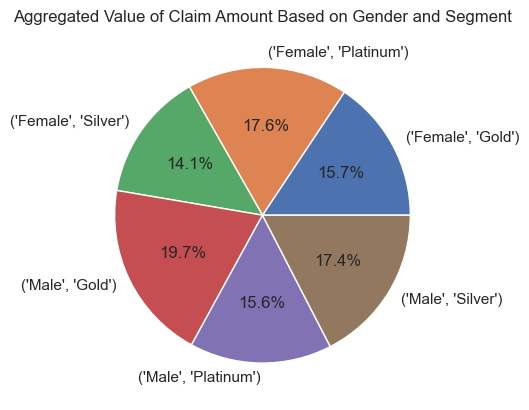

In [19]:
# Aggregating the claim amount based on gender and segment
agg_claim_amount = merged_data.groupby(['gender', 'Segment'])['claim_amount'].sum()

# Creating a pie chart between the aggregated value of claim amount based on gender and segment
plt.pie(agg_claim_amount, labels=agg_claim_amount.index, autopct='%1.1f%%')
plt.title('Aggregated Value of Claim Amount Based on Gender and Segment')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

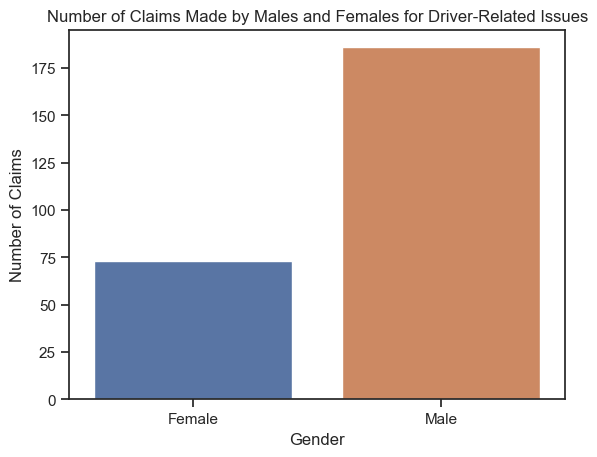

In [20]:
# Counting the number of claims made by males and females for driver-related issues
num_claims = merged_data.loc[merged_data['incident_cause'].str.contains('Driver')].groupby('gender')['customer_id'].count()

# Creating a bar chart to compare the number of claims made by males and females for driver-related issues
sns.barplot(x=num_claims.index, y=num_claims.values)
plt.title('Number of Claims Made by Males and Females for Driver-Related Issues')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

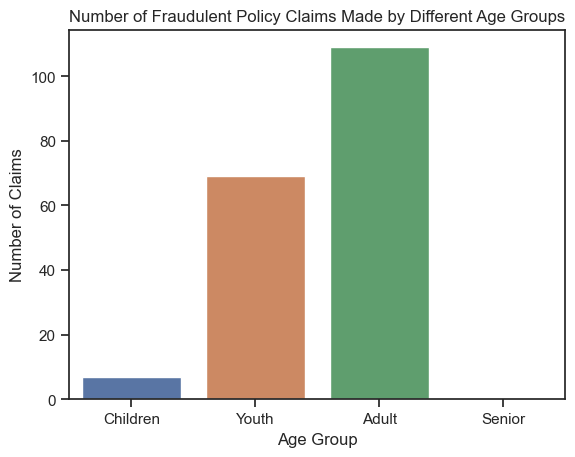

In [21]:
# Counting the number of fraudulent policy claims made by different age groups
num_claims = merged_data.loc[merged_data['fraudulent'] == 'Yes'].groupby('age_category')['customer_id'].count()

# Creating a bar chart to compare the number of fraudulent policy claims made by different age groups
sns.barplot(x=num_claims.index, y=num_claims.values)
plt.title('Number of Fraudulent Policy Claims Made by Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

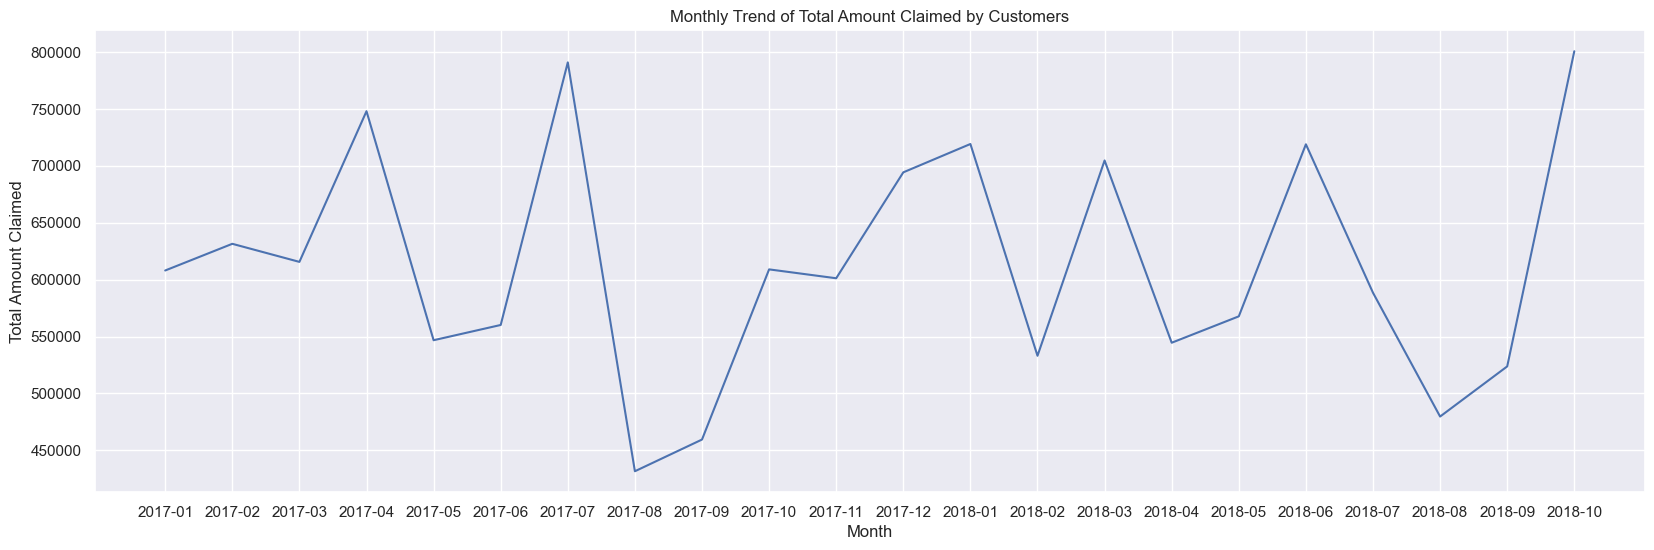

In [22]:
# Converting the "claim_date" column to datetime format
merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'])

# Calculating the monthly total amount claimed by the customers
monthly_total_claim_amount = merged_data.groupby(pd.Grouper(key='claim_date', freq='M'))['claim_amount'].sum()

# Creating a line plot to visualize the monthly trend of the total amount that has been claimed by the customers
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x=monthly_total_claim_amount.index.strftime('%Y-%m'), y=monthly_total_claim_amount.values)
plt.title('Monthly Trend of Total Amount Claimed by Customers')
plt.xlabel('Month')
plt.ylabel('Total Amount Claimed')
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

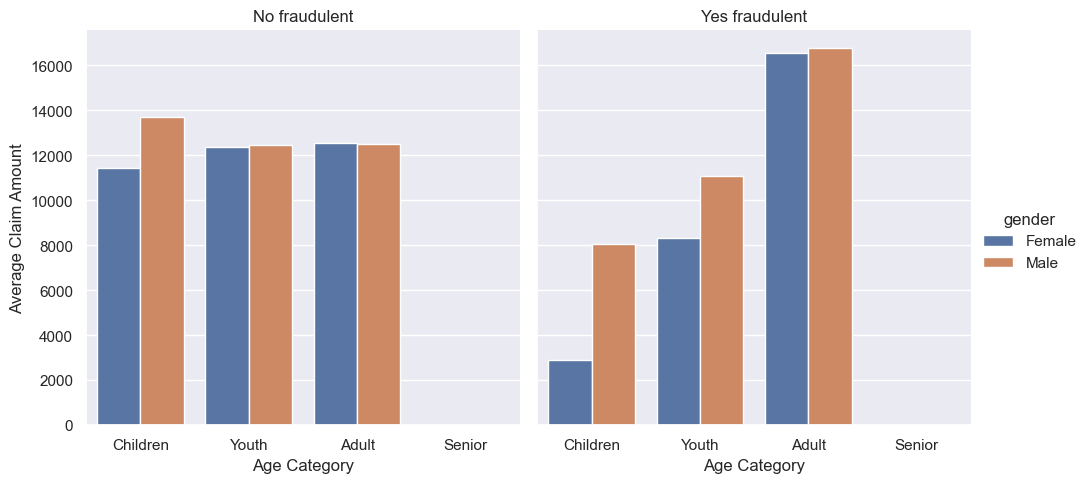

In [48]:
# Calculating the average claim amount for gender and age categories
avg_claim_amount = merged_data.groupby(['gender', 'age_category', 'fraudulent'])['claim_amount'].mean().reset_index()

# Creating a facetted bar chart to represent the average claim amount for gender and age categories
g = sns.catplot(x='age_category', y='claim_amount', hue='gender', col='fraudulent', data=avg_claim_amount, kind='bar')
g.set_axis_labels('Age Category', 'Average Claim Amount')
g.set_titles('{col_name} {col_var}')
plt.show()

# Hypothesis Testing

# 16. Is there any similarity in the amount claimed by males and females?

In [20]:
from scipy.stats import ttest_ind

# Separating the claim amounts for males and females
male_claim_amounts = merged_data.loc[merged_data['gender'] == 'Male']['claim_amount']
female_claim_amounts = merged_data.loc[merged_data['gender'] == 'Female']['claim_amount']

# Performing a two-sample t-test on the claim amounts for males and females
t_statistic, p_value = ttest_ind(male_claim_amounts, female_claim_amounts)

# Displaying the p-value
print(f"The p-value is {p_value}.")

The p-value is 0.33601006135365463.


In [26]:
merged_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.726555,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,39,Adult
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,45,Adult
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,29,Youth
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,46,Adult
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0,37,Adult


# 17. Is there any relationship between age category and segment?


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Creating a contingency table of age category and segment
contingency_table = pd.crosstab(merged_data['age_category'], merged_data['Segment'])

# Performing a chi-square test of independence on the contingency table
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

# Displaying the p-value
print(f"The p-value is {p_value}.")

The p-value is 0.7823228739917292.


# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [25]:
from scipy.stats import ttest_1samp

# Performing a one-sample t-test on the claim amounts
t_statistic, p_value = ttest_1samp(merged_data['claim_amount'], 10000)

# Displaying the p-value
print(f"The p-value is {p_value}.")

The p-value is 1.1110879097327439e-09.


# 19. Is there any difference between age groups and insurance claims?


In [26]:
from scipy.stats import chi2_contingency

# Creating a contingency table of age category and fraudulent claims
contingency_table = pd.crosstab(merged_data['age_category'], merged_data['fraudulent'])

# Performing a chi-square test of independence on the contingency table
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

# Displaying the p-value
print(f"The p-value is {p_value}.")

The p-value is 0.839922698345255.


# 20. Is there any relationship between total number of policy claims and the claimed amount

In [27]:
from scipy.stats import pearsonr

# Performing a Pearson correlation coefficient test on the total_policy_claims and claim_amount columns 
correlation_coefficient, p_value = pearsonr(merged_data['total_policy_claims'], merged_data['claim_amount'])

# Displaying the correlation coefficient and p-value
print(f"The correlation coefficient is {correlation_coefficient} and the p-value is {p_value}.")

The correlation coefficient is -0.021909487420303856 and the p-value is 0.4723849987641153.
